In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import regex as re

pd.set_option('max_columns',30)

In [2]:
dsetPath = '../data/webambiente/data_webambiente.csv'

df = pd.read_csv(dsetPath,sep='\t')

# Check nulls

In [3]:
df[df.isnull().all(axis=1)]

,Espécie,Nome Popular,Sinonímia,Família,Bioma,Formação Vegetal,Fitofisionomias,Presença nos estados,Período de coleta de sementes,Beneficiamento de sementes,Porcentagem de germinação,Substrato da muda,Desenvolvimento da muda no viveiro,Número de sementes/kg,Armazenamento,Semeadura,Nível de sombreamento da muda no viveiro,Tolerância a Sombra,Estratégia ecológica de ocupação,Desenvolvimento da muda no campo,Recomendação de adubação no plantio no campo,Porte da planta,Período de floração,Período de frutificação,Uso Econômico,Caducifolia,Polinização,Dispersão
305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop row in which all values are nulls

In [4]:
df.dropna(how='all',inplace=True)

In [5]:
pd.concat({
    'Num of nulls':df.isnull().sum(), 
    'Pct of nulls':df.isnull().mean().apply(lambda x: "{:.2f}".format(x))}, 
    axis=1).sort_values('Pct of nulls', ascending=False)

,Num of nulls,Pct of nulls
Desenvolvimento da muda no campo,310,0.40
Recomendação de adubação no plantio no campo,297,0.38
Nível de sombreamento da muda no viveiro,275,0.35
Armazenamento,269,0.34
Desenvolvimento da muda no viveiro,258,0.33
Sinonímia,231,0.30
Número de sementes/kg,209,0.27
Porcentagem de germinação,180,0.23
Tolerância a Sombra,157,0.20
Uso Econômico,151,0.19


In [6]:
df['Caducifolia'].value_counts()

NÃO    389
SIM    310
não      2
Name: Caducifolia, dtype: int64

# Data cleaning

In [7]:
from collections import OrderedDict

subst_dict = dict()

# Categorical data

In [8]:
import unicodedata
normalize_str = lambda x: unicodedata.normalize('NFKD',x).encode('ascii', errors='ignore').decode('utf-8').lower().strip()

---

## Identification

### Species names

Separate species names from authors

In [9]:
df['Espécie'].head()

0      Abarema brachystachya(DC.) Barneby & J.W.Grimes
1       Abarema cochleata(Willd.) Barneby & J.W.Grimes
2    Abarema floribunda(Spruce ex Benth.) Barneby &...
3            Abarema jupunba(Willd.) Britton & Killip.
4                  Abarema piresiiBarneby & J.W.Grimes
Name: Espécie, dtype: object

In [10]:
df['Espécie'] = df['Espécie'].apply(lambda x: re.findall('[A-Z]\w+\s[a-z]+',x)[0])

In [11]:
df['Espécie'].head()

0    Abarema brachystachya
1        Abarema cochleata
2       Abarema floribunda
3          Abarema jupunba
4          Abarema piresii
Name: Espécie, dtype: object

Add genus

In [12]:
genus = df['Espécie'].apply(lambda x: x.split(' ')[0])

In [13]:
df.insert(loc=3, column='Gênero', value=genus)

In [14]:
df

,Espécie,Nome Popular,Sinonímia,Gênero,Família,Bioma,Formação Vegetal,Fitofisionomias,Presença nos estados,Período de coleta de sementes,Beneficiamento de sementes,Porcentagem de germinação,Substrato da muda,Desenvolvimento da muda no viveiro,Número de sementes/kg,Armazenamento,Semeadura,Nível de sombreamento da muda no viveiro,Tolerância a Sombra,Estratégia ecológica de ocupação,Desenvolvimento da muda no campo,Recomendação de adubação no plantio no campo,Porte da planta,Período de floração,Período de frutificação,Uso Econômico,Caducifolia,Polinização,Dispersão
0,Abarema brachystachya,"Timbuva, Olho-cabra-azul","Inga brachystachya DC., Abarema obovata (Benth...",Abarema,Fabaceae,Mata Atlântica,"Florestal, Savânica","Floresta Ombrófila Densa, Restinga Arbórea/Arb...","BA, ES, MG, RJ, SC, SP",Mata Atlântica - Jun - Out (SP); Jul -Dez (PR),Os frutos devem ser colhidos diretamente da ár...,50 a 80% (boa),\r\n\r\n\r\nCompostos orgânicos (esterco bovin...,Rápido (entre 30 e 100 cm/ano),1300,Sugerimos condições padrão para sementes com t...,Direta em recipientes individuais,NaN,NÃO (Pioneira típica),Recobrimento,Lento (até 30 cm/ano),NaN,Árvore (> 3 metros),Mata Atlântica - Set - jun(PR); Mar - jun (SP),"Mata Atlântica - jun (SP), jul (PR).",Medicinal,NÃO,Abelhas,Zoocoria (Fauna)
1,Abarema cochleata,"Saboeiro, Inga-chumbinho, Tento",Inga cochleata Willd,Abarema,Fabaceae,Amazônia,"Florestal, Savânica","Campinarana, Savana, Terra Firme","AM, MA, PA, TO",mai-jul,Os frutos devem ser colhidos diretamente da ár...,NaN,\r\n\r\n\r\n3 partes de terra preta+ 1 parte d...,Rápido (entre 30 e 100 cm/ano),NaN,NaN,Indireta em sementeira,Pleno Sol,NÃO (Pioneira típica),Diversidade,Rápido (entre 30 e 100 cm/ano),**Amazônia S01,Árvore (> 3 metros),set-out,out-jul,"Madeireiro, Ornamental",NaN,Beija-flores,Zoocoria (Fauna)
2,Abarema floribunda,Tento,Pithecellobium floribundum Spruce ex Benth,Abarema,Fabaceae,Amazônia,Florestal,Terra Firme,"AC, AM",jan-abr,Os frutos devem ser colhidos diretamente da ár...,NaN,\r\n\r\n\r\n3 partes de terra preta+ 1 parte d...,Rápido (entre 30 e 100 cm/ano),NaN,NaN,Indireta em sementeira,Pleno Sol,NÃO (Pioneira típica),Diversidade,Rápido (entre 30 e 100 cm/ano),**Amazônia S01,Árvore (> 3 metros),jul-out,ago-abr,"Madeireiro, Ornamental",NaN,Beija-flores,Zoocoria (Fauna)
3,Abarema jupunba,"Angelim-falso, Contas-de-nossa-senhora, Ingara...",Acacia jupunba Willdenow,Abarema,Fabaceae,Amazônia,"Florestal, Savânica","Restinga, Terra Firme","AC, AM, AP, BA, CE, ES, MA, MG, PA, PB, PE, RJ...",jun-jul,Os frutos devem ser colhidos diretamente da ár...,10 a 19% (baixa),\r\n\r\n\r\n3 partes de terra preta+ 1 parte d...,Rápido (entre 30 e 100 cm/ano),1300,NaN,Indireta em sementeira,Pleno Sol,NÃO (Pioneira típica),Diversidade,Rápido (entre 30 e 100 cm/ano),**Amazônia S01,Árvore (> 3 metros),out-jan,jan-jul,"Madeireiro, Ornamental",NÃO,Beija-flores,Zoocoria (Fauna)
4,Abarema piresii,Tento,NaN,Abarema,Fabaceae,Amazônia,"Florestal, Savânica","Campinarana, Terra Firme","AM, MG, PA",jan-jun,Os frutos devem ser colhidos diretamente da ár...,NaN,\r\n\r\n\r\n3 partes de terra preta+ 1 parte d...,Rápido (entre 30 e 100 cm/ano),NaN,NaN,Indireta em sementeira,Pleno Sol,NÃO (Pioneira típica),Diversidade,Rápido (entre 30 e 100 cm/ano),**Amazônia S01,Árvore (> 3 metros),mai-set,jan-jun,"Madeireiro, Ornamental",NaN,Beija-flores,Zoocoria (Fauna)
5,Acanthosyris spinescens,Sombra-de-touro,Osyris spinescens Mart. & Eichler,Acanthosyris,Santalaceae,Pampa,"Florestal, Savânica","Floresta Estacional, Vegetaçao Savanóide","GO, PR, RS",NaN,Os frutos devem ser colhidos diretamente da ár...,NaN,\r\n\r\n\r\n\r\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t...,NaN,340,NaN,Indireta em sementeira,NaN,NÃO (Pioneira típica),Diversidade,Lento (até 30 cm/ano),NaN,Árvore (> 3 metros),out-nov,mar-mai,"Alimentício, Latex, Oleaginoso",SIM,insetos,Zoocoria (fauna)
6,Acca sellowiana,Goiaba-serrana,"Orthostemon sellowianus O.Berg, Feijoa obovata...",Acca,Myrtaceae,Pampa,Florestal,"Floresta Es

In [15]:
df['Gênero'].value_counts().head()

Paspalum        19
Aspidosperma    14
Axonopus        13
Inga            13
Eugenia         10
Name: Gênero, dtype: int64

### Vernacular names

In [16]:
df['Nome Popular'].head()

0                             Timbuva, Olho-cabra-azul
1                      Saboeiro, Inga-chumbinho, Tento
2                                                Tento
3    Angelim-falso, Contas-de-nossa-senhora, Ingara...
4                                                Tento
Name: Nome Popular, dtype: object

In [17]:
df['Nome Popular'] = df['Nome Popular'].apply(
    lambda l: [ i.strip() for i in l.split(',')] if not pd.isnull(l) else [] 
)

In [18]:
df['Nome Popular'].head()

0                           [Timbuva, Olho-cabra-azul]
1                    [Saboeiro, Inga-chumbinho, Tento]
2                                              [Tento]
3    [Angelim-falso, Contas-de-nossa-senhora, Ingar...
4                                              [Tento]
Name: Nome Popular, dtype: object

In [19]:
df['Nome Popular'].str.join('|')

0                                Timbuva|Olho-cabra-azul
1                          Saboeiro|Inga-chumbinho|Tento
2                                                  Tento
3      Angelim-falso|Contas-de-nossa-senhora|Ingarana...
4                                                  Tento
5                                        Sombra-de-touro
6                                         Goiaba-serrana
7                                                 Macela
8                                      Castanha-de-cutia
9      Bocaiuva|Macaúba|Coco-babão|Coco-babosa|Coco-m...
10                                            Bambuzinho
11                                                      
12                                                      
13                                                      
14            Tamanqueiro|Minura|Papagaio|Pau-de-tamanco
15     Fruta-de-papagaio|Milho-de-grilo|Tamanqueiro-d...
16                                Criúva|Criúva-do-campo
17     Tinge-cuia|Quinze-cuia|M

### Synonyms

In [20]:
df['Sinonímia'] = df['Sinonímia'].str.findall("[A-Z][a-z]+\s[a-z]+")

In [21]:
df['Sinonímia'] = df['Sinonímia'].str.join('|')

In [22]:
df['Sinonímia'].sample(20)

610                                                  NaN
438                                Chlorophora tinctoria
486                                  Myrciaria cuspidata
439          Macrolobium acaciifolium|Vouapa acaciifolia
528                                  Ferolia obtusifolia
217    Copernicia australis|Copernicia nigra|Copernic...
499    Myrsine lorentziana|Rapanea lorentziana|Rapane...
411    Eschweilera lurida|Chytroma jarana|Eschweilera...
468                                Sideroxylon guyanense
564                                    Piper geniculatum
416                                   Caesalpinea ferrea
764                                                     
147                                                  NaN
565               Acacia gonoacantha|Piptadenia communis
174                                                  NaN
595                                                  NaN
189                                                  NaN
36                             

### Biome

Extract biomes from string into lists

In [23]:
df['Bioma'].head()

0    Mata Atlântica
1          Amazônia
2          Amazônia
3          Amazônia
4          Amazônia
Name: Bioma, dtype: object

In [24]:
df['Bioma'] = df['Bioma'].apply( lambda x: [ normalize_str(b.strip()) for b in x.split(',') ] )

In [25]:
df['Bioma'].head()

0    [mata atlantica]
1          [amazonia]
2          [amazonia]
3          [amazonia]
4          [amazonia]
Name: Bioma, dtype: object

In [26]:
list(set([ i for l in df['Bioma'] for i in l]))

['cerrado', 'pampa', 'mata atlantica', 'amazonia', 'caatinga', 'pantanal']

### States

In [27]:
df['Presença nos estados'].head()

0                               BA, ES, MG, RJ, SC, SP
1                                       AM, MA, PA, TO
2                                               AC, AM
3    AC, AM, AP, BA, CE, ES, MA, MG, PA, PB, PE, RJ...
4                                           AM, MG, PA
Name: Presença nos estados, dtype: object

In [28]:
df['Presença nos estados'] = df['Presença nos estados'].apply( lambda x: [ normalize_str(s.strip()) for s in x.split(',') ] )
df['Presença nos estados'].head()

0                             [ba, es, mg, rj, sc, sp]
1                                     [am, ma, pa, to]
2                                             [ac, am]
3    [ac, am, ap, ba, ce, es, ma, mg, pa, pb, pe, r...
4                                         [am, mg, pa]
Name: Presença nos estados, dtype: object

In [29]:
df.at[df['Presença nos estados'].apply(lambda x: x==['nenhum estado reportado']),'Presença nos estados'] = ''

In [30]:
sorted(list(set([ i for l in df['Presença nos estados'] for i in l])))

['ac',
 'al',
 'am',
 'ap',
 'ba',
 'ce',
 'df',
 'es',
 'go',
 'ma',
 'mg',
 'ms',
 'mt',
 'pa',
 'pb',
 'pe',
 'pi',
 'pr',
 'rj',
 'rn',
 'ro',
 'rr',
 'rs',
 'sc',
 'se',
 'sp',
 'to']

### Vegetation formations

In [31]:
df['Formação Vegetal'].head()

0    Florestal, Savânica
1    Florestal, Savânica
2              Florestal
3    Florestal, Savânica
4    Florestal, Savânica
Name: Formação Vegetal, dtype: object

In [32]:
df['Formação Vegetal'] = df['Formação Vegetal'].apply( lambda x: [ normalize_str(f.strip()) for f in x.split(',') ] )
df['Formação Vegetal'].head()

0    [florestal, savanica]
1    [florestal, savanica]
2              [florestal]
3    [florestal, savanica]
4    [florestal, savanica]
Name: Formação Vegetal, dtype: object

In [33]:
list(set([ i for l in df['Formação Vegetal'] for i in l]))

['campestre', 'florestal', 'savanica']

### Phytophysiognomies

Maybe we could reduce the number of classes here...

In [34]:
df['Fitofisionomias'].head()

0    Floresta Ombrófila Densa, Restinga Arbórea/Arb...
1                     Campinarana, Savana, Terra Firme
2                                          Terra Firme
3                                Restinga, Terra Firme
4                             Campinarana, Terra Firme
Name: Fitofisionomias, dtype: object

In [35]:
df['Fitofisionomias'] = df['Fitofisionomias'].apply(lambda x: [ normalize_str(f.strip()) for f in x.split(',') ])
df['Fitofisionomias'].head()

0    [floresta ombrofila densa, restinga arborea/ar...
1                   [campinarana, savana, terra firme]
2                                        [terra firme]
3                              [restinga, terra firme]
4                           [campinarana, terra firme]
Name: Fitofisionomias, dtype: object

In [36]:
sorted(list(set([ i for l in df['Fitofisionomias'] for i in l])))

['banhado',
 'caatinga arborea',
 'caatinga arbustiva',
 'caatinga ciliar',
 'caatinga herbacea',
 'campinarana',
 'campo de altitude (morraria)',
 'campo inundavel',
 'campo limpo',
 'campo nao inundavel',
 'campo rupestre',
 'campo seco',
 'campo sujo',
 'campo umido',
 'campos naturais',
 'campos rupestres',
 'cerradao',
 'cerrado',
 'cerrado rupestre',
 'cerrado tipico',
 'chaco',
 'floresta estacional',
 'floresta estacional decidual',
 'floresta estacional semidecidual',
 'floresta estacional sempre verde',
 'floresta ombrofila densa',
 'floresta ombrofila mista',
 'formacoes rochosas',
 'manguezal',
 'mata brejo de altitude',
 'mata ciliar',
 'mata de galeria',
 'mata de varzea',
 'mata riparia',
 'mata seca',
 'mata seca (decidua)',
 'mata semidecidua',
 'palmeiral',
 'parque de cerrado',
 'restinga',
 'restinga arborea/arbustiva',
 'savana',
 'terra firme',
 'vegetacao savanoide',
 'vereda']

---

## Seedlings production

### Growth percentage

In [37]:
df['Porcentagem de germinação'].value_counts(dropna=False)

50 a 80% (boa)        254
NaN                   180
20 a 49% (regular)    146
> 80% (ótima)         114
10 a 19% (baixa)       65
< 10% (ruim)           22
Name: Porcentagem de germinação, dtype: int64

In [38]:
df['Porcentagem de germinação'] = df['Porcentagem de germinação'].str.extract( '((?<=\().*(?=\)))', expand=False ).apply(
    lambda x: {'ruim':0,'baixa':1,'regular':2,'boa':3,'otima':4}.get(normalize_str(x)) if pd.notnull(x) else x
)
df['Porcentagem de germinação'].value_counts(dropna=False)

 3.0    254
NaN     180
 2.0    146
 4.0    114
 1.0     65
 0.0     22
Name: Porcentagem de germinação, dtype: int64

### Seedling development in nursery

In [39]:
df['Desenvolvimento da muda no viveiro'].value_counts()

Rápido (entre 30 e 100 cm/ano)    263
Lento (até 30 cm/ano)             201
Muito Rápido ( > 100 cm/ano)       39
lento (até 30 cm/ano)              20
Name: Desenvolvimento da muda no viveiro, dtype: int64

In [40]:
df['Desenvolvimento da muda no viveiro'] = df['Desenvolvimento da muda no viveiro'].str.extract( '([\w\s]+(?=\s\())', expand=False ).apply(
    lambda x: {'lento':0, 'rapido':1, 'muito rapido':2}.get(normalize_str(x)) if pd.notnull(x) else x
)

df['Desenvolvimento da muda no viveiro'].value_counts()

1.0    263
0.0    221
2.0     39
Name: Desenvolvimento da muda no viveiro, dtype: int64

### Seedling Substrate

Remove newline,tab and carriage return characters, and then remove the "Saiba mais" field

In [41]:
df['Substrato da muda'][0]

'\r\n\r\n\r\nCompostos orgânicos (esterco bovino, casca de eucalipto, bagaço de cana) + terra + vermiculita. Mais informações no MANUAL TÉCNICO PARA A RESTAURAÇÃO DE ÁREAS DEGRADADAS NO ESTADO DO RIO DE JANEIRO (Moraes et al., 2012).\r\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t[Saiba mais]\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\r\n\r\n\r\n'

In [42]:
df['Substrato da muda'].replace(to_replace="([\n\t\r])|(\[Saiba mais\])", value='', regex=True,inplace=True)

In [43]:
df['Substrato da muda'][0]

'Compostos orgânicos (esterco bovino, casca de eucalipto, bagaço de cana) + terra + vermiculita. Mais informações no MANUAL TÉCNICO PARA A RESTAURAÇÃO DE ÁREAS DEGRADADAS NO ESTADO DO RIO DE JANEIRO (Moraes et al., 2012).'

In [44]:
df['Substrato da muda'].replace('',pd.np.NaN, inplace=True) # set resulting empty strings to be NaN

In [45]:
df['Substrato da muda'].value_counts()

T3 Floresta (BDF = BEM DRENADO FÉRTIL)                                                                                                                                                                                          214
3 partes de terra preta+ 1 parte de serragem +1  parte de esterco de gado ou cama de aviário                                                                                                                                    167
T1 Cerrado (BDPF = BEM DRENADO POUCO FÉRTIL)                                                                                                                                                                                     88
Compostos orgânicos (esterco bovino, casca de eucalipto, bagaço de cana) + terra + vermiculita. Mais informações no MANUAL TÉCNICO PARA A RESTAURAÇÃO DE ÁREAS DEGRADADAS NO ESTADO DO RIO DE JANEIRO (Moraes et al., 2012).     66
T4 Floresta (MDF = MAL DRENADO FÉRTIL)                                                  

In [46]:
df['Substrato da muda'] = df['Substrato da muda'].apply(lambda x: normalize_str(x) if not pd.isnull(x) else np.NaN)
df['Substrato da muda'].value_counts()

t3 floresta (bdf = bem drenado fertil)                                                                                                                                                                                          214
3 partes de terra preta+ 1 parte de serragem +1  parte de esterco de gado ou cama de aviario                                                                                                                                    167
t1 cerrado (bdpf = bem drenado pouco fertil)                                                                                                                                                                                     88
compostos organicos (esterco bovino, casca de eucalipto, bagaco de cana) + terra + vermiculita. mais informacoes no manual tecnico para a restauracao de areas degradadas no estado do rio de janeiro (moraes et al., 2012).     66
t4 floresta (mdf = mal drenado fertil)                                                  

In [47]:
subst_dict['Substrato da muda'] = OrderedDict([
        ( 't1 cerrado (bdpf = bem drenado pouco fertil)', 't1'),
        ( 't2 cerrado (sdpf = super drenado pouco fertil)', 't2'),
        ( 't3 floresta (bdf = bem drenado fertil)', 't3' ),
        ( 't4 floresta (mdf = mal drenado fertil)', 't4'),
        ( 'compostos organicos (esterco bovino, casca de eucalipto, bagaco de cana) + terra + vermiculita. mais informacoes no manual tecnico para a restauracao de areas degradadas no estado do rio de janeiro (moraes et al., 2012).', 'ga'),
        ( '3 partes de terra preta+ 1 parte de serragem +1  parte de esterco de gado ou cama de aviario', 's1'),
        ( 'solo + 20% cama de aviario + npk (10.28.20)', 's2')
    ])  

In [48]:
# Perform substitution
for k,v in subst_dict['Substrato da muda'].items():
    df.at[ df['Substrato da muda']==k, 'Substrato da muda' ] = v

In [49]:
df['Substrato da muda'].value_counts()

t3    214
s1    167
t1     88
ga     66
t4     23
t2      3
s2      1
Name: Substrato da muda, dtype: int64

### Number of seeds per kg

In [50]:
df['Número de sementes/kg'].isnull().sum()

209

In [51]:
# Remove any periods
df['Número de sementes/kg'] = df['Número de sementes/kg'].str.replace('.','')

In [52]:
# Which of those must be manually corrected?
df['Número de sementes/kg'].dropna()[df['Número de sementes/kg'].dropna().str.match('.*([^0-9\sa-])+.*$')]

271    1700 unidades (Lorenzi, 1998a)
321                       4,8 milhões
408                          1 milhão
415                      23200; 29000
424                 200 mil a 300 mil
749    1850 unidades (Lorenzi, 1998b)
Name: Número de sementes/kg, dtype: object

In [53]:
subst_dict['Número de sementes/kg'] = OrderedDict([
        ( '1700 unidades (Lorenzi, 1998a)', '1700'),
        ( '4,8 milhões', '4800000'),
        ( '1 milhão', '1000000'),
        ( '23200; 29000', '23200 a 29000'),
        ( '200 mil a 300 mil', '200000 a 300000' ),
        ( '1850 unidades (Lorenzi, 1998b)', '1850' ),
        ( '83300  86000', '83300 - 86000'),
        ( '3800 4800', '3800- 4800')
    ])  

# Perform substitution
for k,v in subst_dict['Número de sementes/kg'].items():
    df.at[ df['Número de sementes/kg']==k, 'Número de sementes/kg' ] = v

In [54]:
# Did we succesfully correct all?
df['Número de sementes/kg'].dropna().loc[ df['Número de sementes/kg'].dropna().str.match('.*([^0-9\sa-])+.*$') ]

Series([], Name: Número de sementes/kg, dtype: object)

In [55]:
# Now, deal with range strings
spk_ranges = df['Número de sementes/kg'].dropna().loc[df['Número de sementes/kg'].dropna().str.match('\d+\s*(a|-)\s*\d+')]
spk_ranges

15        7600 a 29000
25        2300 a 43800
28       18436 a 29850
34          750 a 1300
38        8600 a 15600
65         6000 a 8000
72        5000 a 11000
76          700 a 1100
84         3300 a 3800
94             10 a 40
111          270 a 500
117        1700 a 2200
141      11000 a 16000
143        1200 a 3000
150          160 a 750
156      13000 a 30000
162          145 a 200
166           32 a 145
171        1276 a 5400
175    700000 a 800000
205        2300 - 4300
212        1200 a 4000
213        1700 a 2000
214        1720 a 2200
215        1700 a 2000
216        1700 a 2000
224          625 - 750
227      20000 a 35200
229             5 a 15
262        3700 a 4500
            ...       
609         570 a 1200
611        5700 a 8000
612        5200 a 6200
613        5200 a 8300
615      11000 a 30000
618      18500 a 19600
632          170 a 450
641      70400 a 90000
642        4000 a 6600
645      29200 a 35000
646      31000 a 44000
656       9600 a 13500
658      20

In [56]:
ser = spk_ranges.str.split('a|-').apply( lambda x: str( (int(x[0])+int(x[1]))/2 ) )
ix=ser.index

In [57]:
df.at[ix,'Número de sementes/kg'] = ser

In [58]:
df['Número de sementes/kg'].dropna().loc[df['Número de sementes/kg'].dropna().str.match('\d+\s+(a|-|\s)\s+\d+')]

Series([], Name: Número de sementes/kg, dtype: object)

In [59]:
# make this a numeric field and divide by 1000 (unit becomes 1000 seeds per kg)
df['Número de sementes/kg'] = df['Número de sementes/kg'].astype(float)/1000

In [60]:
(df['Número de sementes/kg']).describe()

count      572.000000
mean       442.687622
std       4009.065596
min          0.010000
25%          1.300000
50%          6.500000
75%         30.250000
max      66666.666000
Name: Número de sementes/kg, dtype: float64

### Seeding method

In [61]:
df['Semeadura'].value_counts()

Indireta em sementeira                     343
Direta em recipientes individuais          315
Indireta em estratificação com serragem      1
Name: Semeadura, dtype: int64

In [62]:
df['Semeadura'] = df['Semeadura'].apply(
    lambda x: {'Indireta em sementeira': 1,
               'Direta em recipientes individuais': 2,
               'Indireta em estratificação com serragem':0}.get(x) if pd.notnull(x) else x
)

df['Semeadura'].value_counts()

1.0    343
2.0    315
0.0      1
Name: Semeadura, dtype: int64

### Shading level in nursery

In [63]:
df['Nível de sombreamento da muda no viveiro'].value_counts()

50%          301
Pleno Sol    186
75%           16
30%            3
Name: Nível de sombreamento da muda no viveiro, dtype: int64

In [64]:
df['Nível de sombreamento da muda no viveiro'] = df['Nível de sombreamento da muda no viveiro'].apply(
    lambda x: {'30%':0, '50%':1, '75%':2, 'Pleno Sol':3}.get(x) if pd.notnull(x) else x
)

df['Nível de sombreamento da muda no viveiro'].value_counts()

1.0    301
3.0    186
2.0     16
0.0      3
Name: Nível de sombreamento da muda no viveiro, dtype: int64

---

## Planting

### Shading tolerance

In [65]:
df['Tolerância a Sombra'].value_counts()

NÃO (Pioneira típica)                         252
SIM (Tolerante em todo o ciclo de vida)       191
INDIFERENTE (Tolerante no início do ciclo)    181
Name: Tolerância a Sombra, dtype: int64

In [66]:
df['Tolerância a Sombra'] = df['Tolerância a Sombra'].str.extract('(\w+)(?= \()', expand=False).apply(
    lambda x: {'NÃO':0, 'SIM':1, 'INDIFERENTE':2}.get(x)
)

df['Tolerância a Sombra'].value_counts()

0.0    252
1.0    191
2.0    181
Name: Tolerância a Sombra, dtype: int64

### Occupation strategy

In [67]:
df['Estratégia ecológica de ocupação'].value_counts()

Diversidade     470
Recobrimento    201
Name: Estratégia ecológica de ocupação, dtype: int64

In [68]:
df['Estratégia ecológica de ocupação'] = df['Estratégia ecológica de ocupação'].apply(
    lambda x: {'Diversidade':'diversidade','Recobrimento':'recobrimento'}.get(x)
)

df['Estratégia ecológica de ocupação'].value_counts()

diversidade     470
recobrimento    201
Name: Estratégia ecológica de ocupação, dtype: int64

### Seedling development in field

In [69]:
df['Desenvolvimento da muda no campo'].value_counts(dropna=False)

NaN                               310
Rápido (entre 30 e 100 cm/ano)    219
Lento (até 30 cm/ano)             217
Muito Rápido ( > 100 cm/ano)       34
b                                   1
Name: Desenvolvimento da muda no campo, dtype: int64

In [70]:
df['Desenvolvimento da muda no campo'] = df['Desenvolvimento da muda no campo'].str.extract( '([\w\s]+(?=\s\())', expand=False ).apply(
    lambda x: {'lento':0, 'rapido':1, 'muito rapido':2}.get(normalize_str(x)) if pd.notnull(x) else x
)

df['Desenvolvimento da muda no campo'].value_counts(dropna=False)

NaN     311
 1.0    219
 0.0    217
 2.0     34
Name: Desenvolvimento da muda no campo, dtype: int64

### Fertilizing recommendation in field

In [71]:
df['Recomendação de adubação no plantio no campo'].value_counts()

P3=> BDF: espéceis de Mata Seca (Ex.: Myracrodruon urundeuva)                                                                                                                                        194
**Amazônia S01                                                                                                                                                                                       167
P2=> BDPF: espécies de Cerrado (Ex.: Caryocar brasiliense, Eugenia dysenterica)                                                                                                                       91
P4=> MDF: espécies de zonas ripárias (Ex.: Protium heptaphyllum, Mauritia flexuosa)                                                                                                                   24
P1=> SDPF: espécies de Cerrado.                                                                                                                                                                     

In [72]:
df['Recomendação de adubação no plantio no campo'] = df['Recomendação de adubação no plantio no campo'].apply(
    lambda x: {'P3=> BDF: espéceis de Mata Seca (Ex.: Myracrodruon urundeuva)':'p3',
               '**Amazônia S01': 's01',
               'P2=> BDPF: espécies de Cerrado (Ex.: Caryocar brasiliense, Eugenia dysenterica)':'p2',
               'P4=> MDF: espécies de zonas ripárias (Ex.: Protium heptaphyllum, Mauritia flexuosa)': 'p4',
               'P1=> SDPF: espécies de Cerrado.': 'p1',
               'Durante o plantio no campo deve-se aplicar 250 kg/ha de\r\nsuperfosfato simples e após o estabelecimento das plantas deve-se fazer uma  adubação de cobertura com 70kg/ha de cloreto de potássio.':'f1',
               'Adubação fosfatada.':'f2',
               'Dispensa total de fertilizantes em cultivo artificial.': 'nenhum'
              }.get(x)
)

df['Recomendação de adubação no plantio no campo'].value_counts()

p3        194
s01       167
p2         91
p4         24
p1          5
nenhum      1
f2          1
f1          1
Name: Recomendação de adubação no plantio no campo, dtype: int64

---

## Additional info

### Plant size

In [73]:
df['Porte da planta'].head()

0    Árvore (> 3 metros)
1    Árvore (> 3 metros)
2    Árvore (> 3 metros)
3    Árvore (> 3 metros)
4    Árvore (> 3 metros)
Name: Porte da planta, dtype: object

In [74]:
df['Porte da planta'] = df['Porte da planta'].apply(lambda x: normalize_str(x) )
df['Porte da planta'].value_counts()

arvore (> 3 metros)        539
erva                       117
arbusto                     45
arvoreta (  3 metros)       37
palmeira                    25
subarbusto                  10
liana                        7
arvore (> que 3 metros)      1
Name: Porte da planta, dtype: int64

let's clean some of the categories above

In [75]:
subst_dict['Porte da planta'] = OrderedDict([
        ( 'arvore (> que 3 metros)', 'arvore (> 3 metros)' ),
        ( 'arvore (> 3 metros)', 'arvore'),
        ( 'arvoreta (  3 metros)', 'arvoreta')
    ])  

In [76]:
# Perform substitution
for k,v in subst_dict['Porte da planta'].items():
    df.at[ df['Porte da planta']==k, 'Porte da planta' ] = v

In [77]:
df['Porte da planta'].value_counts()

arvore        540
erva          117
arbusto        45
arvoreta       37
palmeira       25
subarbusto     10
liana           7
Name: Porte da planta, dtype: int64

### Economic uses

In [78]:
df['Uso Econômico'] = df['Uso Econômico'].apply(
    lambda l: [ normalize_str(s) for s in l.split(',') ] if pd.notnull(l) else []
)

In [79]:
sorted(set([ i for l in df['Uso Econômico'] for i in l]))

['alimenticio',
 'aromatico',
 'artesanal',
 'celulose',
 'condimento',
 'cortica',
 'cosmetico',
 'cultural/ritualistico',
 'fibra',
 'forrageiro',
 'goma/espessante',
 'latex',
 'madeireiro',
 'medicinal',
 'melifero',
 'oleaginoso',
 'ornamental',
 'repelente',
 'resina',
 'tanifero',
 'tintorial',
 'toxico para animais']

### Deciduous?

In [80]:
df['Caducifolia'].value_counts(dropna=False)

NÃO    389
SIM    310
NaN     80
não      2
Name: Caducifolia, dtype: int64

In [81]:
df['Caducifolia'] = df['Caducifolia'].apply(lambda x: {'nao':0,'sim':1}[normalize_str(x)] if pd.notnull(x) else x)
df['Caducifolia'].value_counts(dropna=False)

 0.0    391
 1.0    310
NaN      80
Name: Caducifolia, dtype: int64

### Dispersion strategy

In [82]:
df['Dispersão'].value_counts()

Anemocoria (vento)       224
Zoocoria (Fauna)         214
Zoocoria (fauna)         177
Autocoria                 93
Epizoocoria               17
Autocoria, hidrocoria      2
Hidrocórica                1
Name: Dispersão, dtype: int64

In [83]:
subst_dict['Dispersão'] = OrderedDict([
        ( 'Zoocoria (Fauna)', 'zoocoria'),
        ( 'Zoocoria (fauna)', 'zoocoria'),
        ( 'Anemocoria (vento)', 'anemocoria'),
        ( 'Hidrocórica', 'hidrocoria')
    ])  


# Perform substitution
for k,v in subst_dict['Dispersão'].items():
    df.at[ df['Dispersão']==k, 'Dispersão' ] = v

In [84]:
df['Dispersão'].value_counts()

zoocoria                 391
anemocoria               224
Autocoria                 93
Epizoocoria               17
Autocoria, hidrocoria      2
hidrocoria                 1
Name: Dispersão, dtype: int64

In [85]:
df['Dispersão'] = df['Dispersão'].apply( 
    lambda x: [ normalize_str(f.strip()) for f in x.split(',')] if not pd.isnull(x) else x
)

In [86]:
sorted(list(set([ i for l in [l for l in df['Dispersão'] if isinstance(l,list) ] for i in l])))

['anemocoria', 'autocoria', 'epizoocoria', 'hidrocoria', 'zoocoria']

### Polination strategy

In [87]:
df['Polinização'].value_counts()

Abelhas                                                   291
Vento                                                      68
Mariposas                                                  37
Morcegos                                                   32
abelhas                                                    29
insetos                                                    28
Besouros                                                   25
Abelhas, moscas                                            21
Beija-flores                                               18
Abelhas, besouros                                          16
abelhas e diversos insetos pequenos                        15
Abelhas, vespas                                            12
Moscas                                                     11
Abelhas, mariposas                                         10
Morcegos, beija-flores                                      6
abelhas e outros insetos                                    6
Abelhas,

In [88]:
pol_df = df['Polinização'].str.replace('\(.*\)','',regex=True)\
                 .str.replace('(\We\W)|,|;', '|', regex=True)\
                 .apply(
    lambda x: [normalize_str(f.strip()) for f in x.split('|')] if not pd.isnull(x) else []
)

sorted(list(set(
    [ pol.strip() for polinators in 
      pol_df.dropna()
      for pol in polinators ]
)))

['abelha',
 'abelhas',
 'abelhas sem ferrao',
 'autopolinizacao',
 'aves',
 'beija-flores',
 'besouros',
 'borboletas',
 'coleopteros',
 'dipteros',
 'diversos insetos pequenos',
 'diversos pequenos insetos',
 'do genero bombus',
 'formigas',
 'hemipteros',
 'insetos',
 'insetos pequenos',
 'mariposa',
 'mariposas',
 'marsupiais',
 'megachile.',
 'microhimenopteros da familia vespidae',
 'morcegos',
 'moscas',
 'outros insetos',
 'pequenos insetos',
 'principalmene abelhas',
 'sirfideos',
 'vento',
 'vespas']

In [89]:
list_replaces = {
    'abelha': 'abelhas',
    'abelhas sem ferrao': 'abelhas',
    'principalmene abelhas': 'abelhas',
    'diversos insetos pequenos':'insetos pequenos',
    'diversos pequenos insetos':'insetos pequenos',
    'do genero bombus': 'abelhas',
    'mariposa': 'mariposas',
    'megachile.': 'abelhas',
    'microhimenopteros da familia vespidae': 'insetos pequenos',
    'outros insetos': 'insetos',
    'pequenos insetos':'insetos pequenos'
}

In [90]:
pol_df = pol_df.apply(
    lambda x: [ list_replaces.get(i) if list_replaces.get(i) is not None else i for i in x ]  
)

# list all distinct polinators
sorted(list(set(
    [ pol.strip() for polinators in 
      pol_df.dropna()
      for pol in polinators ]
)))

['abelhas',
 'autopolinizacao',
 'aves',
 'beija-flores',
 'besouros',
 'borboletas',
 'coleopteros',
 'dipteros',
 'formigas',
 'hemipteros',
 'insetos',
 'insetos pequenos',
 'mariposas',
 'marsupiais',
 'morcegos',
 'moscas',
 'sirfideos',
 'vento',
 'vespas']

In [91]:
len(sorted(list(set(
    [ pol.strip() for polinators in 
      pol_df.dropna()
      for pol in polinators ]
))))

19

In [92]:
df['Polinização']=pol_df
df['Polinização'].sample(15)

746                [abelhas]
769      [abelhas, dipteros]
732                  [vento]
261                [abelhas]
738                [abelhas]
512                [abelhas]
629                [abelhas]
89                [besouros]
553                [abelhas]
612                [abelhas]
568    [abelhas, borboletas]
482                [abelhas]
328                [abelhas]
127                       []
19            [beija-flores]
Name: Polinização, dtype: object

---

# Descriptive data

Fields: "Beneficiamento de sementes", "Armazenamento",

In [93]:
df['Beneficiamento de sementes'].value_counts().head()

Coleta dos pendões com foice de mão. Observar que as sementes devem estar dispersando (soltando naturalmente dos pendões). Os pendões são passados em máquina trituradora de palha (ensiladeira) para desagregação das sementes.                                           45
Colher as vagens diretamente da árvore quando iniciarem o amarelamento do fruto. Em seguida abri-las e retirar as sementes manualmente. Fazer o plantio direto, não deixá-las secar, pois as sementes não toleram perda de umidade.                                        13
Os frutos devem se colhidos diretamente da árvore quando maduros. Em seguida, deixá-los amontoados em saco plástico até o apodrecimento parcial da polpa. Remover as sementes com o auxilio de água corrente na peneira e deixá-las secar em ambiente arejado à sombra.     8
Colheita e abertura manual dos frutos. Observar que os frutos devem estar secos e ainda fechados, ou começando a abrir ainda com sementes dentro.                                             

In [94]:
df['Armazenamento'].value_counts().head()

Tempo indeterminado em câmara fria.                                            186
Semente recalcitrante. Pouco tempo de armazenamento em câmara fria.            170
De um a dois anos em câmara fria.                                               27
Sementes recalcitrantes. Pouco tempo de armazenamento em câmara fria úmida.     16
recalcitrante                                                                   12
Name: Armazenamento, dtype: int64

---

# Period-like data

Period-like data describe periods in which an event occurrs (or is observed). In this dataset, we have period-like fields such as flowering period `Período de Floração` and seed gathering period `Período de Coleta de Sementes`. 
In this dataset, this is descriptive data, and must be parsed and structure before it can be useful. 

In [95]:
subst_dict = {
    'ao longo do ano': 'jan-dez',
    'Cerrado - Ao longo do ano': 'Cerrado - jan-dez',
    'Cerrado - ano todo': 'Cerrado - jan-dez',
    'Pantanal -  Não floresce todos os anos e nem em todos os locais. (Pott & Pott, 1994)': np.NaN,
    'Ao longo do ano':'jan-dez',
    'Cerrado - ano todo': 'Cerrado - jan-dez',
    'Pantanal -  Fruto verde presente o ano todo, maduro no verão (Pott & Pott, 1994)': 'Pantanal: jan-dez',
    'Pantanal -  inicio da estação chuvosa (Pott & Pott, 1994)': 'Pantanal: set-mar'
}

# Perform substitution
for k,v in subst_dict.items():
    df.at[df['Período de floração']==k, 'Período de floração']=v
    df.at[df['Período de coleta de sementes']==k, 'Período de coleta de sementes']=v
    df.at[df['Período de frutificação']==k, 'Período de frutificação']=v

In [96]:
pf = df['Período de floração']
pcs = df['Período de coleta de sementes']
pfru = df['Período de frutificação']

In [97]:
set( v for v in pf )

{'Amazônia - out-fev; Caatinga - ago - nov',
 'Caatinga - out - nov; Pampa - out-jan',
 'Cerrado - Ao longo do ano; Pampa - dez-mar',
 'Cerrado - abr-jul',
 'Cerrado - abr-jul; Mata Atlântica - fev - abr (abr-jun)',
 'Cerrado - abr-jul; Pampa - fev-abr',
 'Cerrado - abr-jun',
 'Cerrado - abr-jun ; Pantanal -  jun - jul (Pott & Pott, 1994)',
 'Cerrado - abr-mai',
 'Cerrado - abr-out ; Pantanal -  jul até out (Pott & Pott, 1994); Amazônia - ago-set',
 'Cerrado - abr-set',
 'Cerrado - abr-set ; Pantanal -  abr-set',
 'Cerrado - abr-set ; Pantanal -  jun a set (Pott & Pott, 1994)',
 'Cerrado - ago ; Mata Atlântica - ago - set; Pampa - jul-nov',
 'Cerrado - ago-abr ; Pantanal -  out - fev (Pott & Pott, 1994)',
 'Cerrado - ago-dez ; Mata Atlântica - ago - dez',
 'Cerrado - ago-dez ; Mata Atlântica - ago - set ago-dez)',
 'Cerrado - ago-dez ; Pantanal -  ago até dez (Pott & Pott, 1994)',
 'Cerrado - ago-dez ; Pantanal -  out a jan (Pott & Pott, 1994)',
 'Cerrado - ago-fev; Pampa - out-nov',
 

In [98]:
set( v for v in pcs )

{'Amazônia - out-fev; Caatinga - out - nov',
 'Cerrado - Ano todo ; Mata Atlântica - Ago - Mar(PR); Set (SC); Out - Nov  (RS)',
 'Cerrado - Ano todo; out-mar',
 'Cerrado - Ao longo do ano; Pampa - dez-mar',
 'Cerrado - Jul-out  ; Mata Atlântica - jul-dez ; Pantanal -  out a fev; Amazônia - jul-out; Caatinga - out - dez',
 'Cerrado - abr -out   ; Mata Atlântica - mai - out; Pantanal - abr-out',
 'Cerrado - abr-jul',
 'Cerrado - abr-jul ; Mata Atlântica - abr - jul ; Pantanal -  Flor e frutos na estação chuvosa (Pott & Pott, 1994)',
 'Cerrado - abr-jul ; Mata Atlântica - jan - mar',
 'Cerrado - abr-jun',
 'Cerrado - abr-mai',
 'Cerrado - abr-mar',
 'Cerrado - abr-out',
 'Cerrado - abr-set',
 'Cerrado - abr-set ; Pantanal -  dez-jan',
 'Cerrado - ago - set ; Mata Atlântica - ago - set',
 'Cerrado - ago -nov   ; Pantanal -  ago -nov',
 'Cerrado - ago -nov ; Pantanal -  mai-jul',
 'Cerrado - ago ; Pantanal -  ago-set',
 'Cerrado - ago-fev',
 'Cerrado - ago-fev ; Pantanal -  ago-dez; Amazôni

In [99]:
set( v for v in pfru )

{'Amazônia - out-fev; Caatinga - set - jan',
 'Caatinga - dez - jan; Pampa - jan-mar',
 'Cerrado - Ano todo; mar-jul',
 'Cerrado - Ano todo; out-nov ; Mata Atlântica - abr - out',
 'Cerrado - Ao longo do ano; Pampa - dez-mar',
 'Cerrado - abr - jun/out ; Mata Atlântica - abr - jun/out',
 'Cerrado - abr-dez',
 'Cerrado - abr-dez; Pampa - mai-jul',
 'Cerrado - abr-jul',
 'Cerrado - abr-jul ; Mata Atlântica - jun - abr (abr-jul) ; Pantanal -  Flor e frutos na estação chuvosa (Pott & Pott, 1994)',
 'Cerrado - abr-jul ; Mata Atlântica - mar - out (abr-jun) ; Pantanal -  Fruto em grande quantidade, permanece vários meses secos na planta (Pott & Pott, 1994)',
 'Cerrado - abr-jul ; Pantanal -  jul a nov (Pott & Pott, 1944); Amazônia - ago-set',
 'Cerrado - abr-jun',
 'Cerrado - abr-mai',
 'Cerrado - abr-nov',
 'Cerrado - abr-out',
 'Cerrado - abr-set',
 'Cerrado - abr-set ; Pantanal -  dez-jan',
 'Cerrado - ago ; Pantanal -  ago até out (Pott & Pott, 1994)',
 'Cerrado - ago-dez',
 'Cerrado - a

We define some helper functions for cleaning such data.

In [100]:
MONTHS = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
BIOMES = ['cerrado', 'amazonia', 'mata atlantica', 'caatinga', 'pampa', 'pantanal']
STATES = [  'ac','al','ap','am','ba','ce','df','es','go','ma','mt','ms','mg','pa','pb','pr','pe','pi','rj','rn','rs','ro','rr','sc','sp','se','to']


def getclass(el):
    # Classifies an element in either a biome, a month or a state
    return dict( [(m,'m') for m in MONTHS]+[(b,'b') for b in BIOMES]+[(s,'s') for s in STATES] )[el]


def nobiome(l):
    # Returns True if no biome is in the list l, False otherwise
    return False if sum(getclass(i)=='b' for i in l) else True

    
def getnextstate(l,i):
    # starting from index i, iterates the list for the next item which is a state. 
    # if input i refers to an element which is a biome, ignore it and start from the next one.
    # If no state is found before a biome, returns None
    
    if getclass(l[i]):
        i+=1
        
    for el in l[i:]:
        if getclass(el)=='b':
            return None
        if getclass(el)=='s':
            return el


def structure_pldata_fromlist(l):
    """
    Structures a list of biomes, states and months using the following dict structure:
    
    Examples:
        [In]
        >> structure( ['cerrado','jun','set', 'mata atlantica', 'mai','ago','sc','jun','jul','rj'] )
        
        [Out]
        >> { 'cerrado': ['jun','set'],
             'mata atlantica': {
               'sc': ['mai','ago'],
               'rj': ['jun','jul']
              }
           }
           
        [In]
        >> structure( ['jun','set'] )
        
        [Out]
        >> { 'all': ['jun','set'] }
    """
    d={}
    if nobiome:
        currentBiome='all'
    
    for i,el in enumerate(l):
        # whenever a new biome
        if getclass(el)=='b':
            currentBiome=el
            if getnextstate(l,i):
                d[el]=dict()
            else:
                d[el]=[]
        
        # whenever a new month
        elif getclass(el)=='m':
            state=getnextstate(l,i)
            if state:
                try:
                    d[currentBiome][state].append(el)
                except KeyError:
                    d[currentBiome][state]=[el]
            else:
                try:
                    d[currentBiome].append(el)
                except:
                    d[currentBiome]=[el]
                
    return d

In [101]:
def structure_periods(ser):
    """
    Takes a period-like data series (descriptive string) and converts into a structured format.
    
    """
    
    # normalize strings
    ser_norm = ser.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    ser_norm = ser_norm.str.lower()

    # define regex to use and findall
    # collects matched elements in sequence, into a list
    restr = '|'.join(MONTHS+BIOMES+['(?<=\W)'+s+'(?=\W)' for s in STATES])
    ser_l = ser_norm.apply(lambda x: re.findall( restr, x) if pd.notnull(x) else x)
    
    # structure resulting list
    return ser_l.apply(lambda l: structure_pldata_fromlist(l) if isinstance(l,list) else l)

Now, this is how structured period-like data should look like:

In [102]:
pf_structured = structure_periods(pf)
pf_structured

0      {'mata atlantica': {'pr': ['set', 'jun'], 'sp'...
1                                {'all': ['set', 'out']}
2                                {'all': ['jul', 'out']}
3                                {'all': ['out', 'jan']}
4                                {'all': ['mai', 'set']}
5                                {'all': ['out', 'nov']}
6                                {'all': ['set', 'out']}
7                            {'cerrado': ['mar', 'jun']}
8                                {'all': ['jan', 'mar']}
9      {'cerrado': ['jul', 'fev'], 'pantanal': ['out'...
10                               {'all': ['out', 'dez']}
11                                      {'all': ['out']}
12                               {'all': ['out', 'abr']}
13                                                   NaN
14                           {'cerrado': ['dez', 'jan']}
15                           {'cerrado': ['set', 'dez']}
16                           {'cerrado': ['jun', 'ago']}
17     {'cerrado': ['jun', 'out

In [103]:
pcs_structured = structure_periods(pcs)
pcs_structured

0      {'mata atlantica': {'sp': ['jun', 'out'], 'pr'...
1                                {'all': ['mai', 'jul']}
2                                {'all': ['jan', 'abr']}
3                                {'all': ['jun', 'jul']}
4                                {'all': ['jan', 'jun']}
5                                                    NaN
6                                                    NaN
7                            {'cerrado': ['ago', 'out']}
8                                {'all': ['jul', 'nov']}
9      {'cerrado': ['ago', 'fev'], 'pantanal': ['ago'...
10                                                   NaN
11                               {'all': ['dez', 'jan']}
12                               {'all': ['nov', 'dez']}
13                               {'all': ['set', 'dez']}
14                           {'cerrado': ['fev', 'jun']}
15                           {'cerrado': ['jan', 'jun']}
16                           {'cerrado': ['mar', 'abr']}
17     {'cerrado': ['nov', 'dez

In [104]:
pfru_structured = structure_periods(pfru)
pfru_structured

0      {'mata atlantica': {'sp': ['jun'], 'pr': ['jul...
1                                {'all': ['out', 'jul']}
2                                {'all': ['ago', 'abr']}
3                                {'all': ['jan', 'jul']}
4                                {'all': ['jan', 'jun']}
5                                {'all': ['mar', 'mai']}
6                                {'all': ['mar', 'mai']}
7                            {'cerrado': ['abr', 'out']}
8                                {'all': ['jul', 'nov']}
9      {'cerrado': ['out', 'dez'], 'pantanal': ['jan'...
10                                                   NaN
11                               {'all': ['dez', 'jan']}
12                                                   NaN
13                                                   NaN
14                           {'cerrado': ['fev', 'abr']}
15                           {'cerrado': ['nov', 'jan']}
16                           {'cerrado': ['jan', 'mar']}
17     {'cerrado': ['out', 'nov

### Dealing with inconsistencies

There may be some inconsistencies, though. For example, each list containing month names should contain an even number of months (we assume elements at odd positions are starting months, and elments at even positions are ending months). A set of rules allows us to deal with most cases. 

For instance, if a list of months has length 1, we assume that the event only occurrs at that month. Therefore, both the start and end values are set to be that month (this corresponds to duplicating the month).

In [105]:
from copy import deepcopy

def duplicate_single_months(data):
    # If a month list is composed of a single month, duplicate it (starts and ends at the same month)
    if pd.isnull(data):
        return np.NaN
    
    data = deepcopy(data)
    
    for b,month_data in data.items():
        if isinstance(month_data,dict):
            for state,month_list in month_data.items():
                if len(month_list)==1:
                    month_list.append(month_list[0])
        elif isinstance(month_data,list):
            if len(month_data)==1:
                month_data.append(month_data[0])
        
    return data

In [106]:
def check_inconsistencies(ser):
    
    # month list length inconsistencies
    def list_length_inconsistency(data):
        if pd.isnull(data):
            return True

        for b,month_data in data.items():
            if isinstance(month_data,dict):
                for state,month_list in month_data.items():
                    if len(month_list)%2!=0: return True
            else:
                if len(month_data)%2!=0: return True
        return False
    
    
    return ser.apply(list_length_inconsistency)

Let's apply the corrections to the series and then check for inconsistencies.
As we see, only few records demand manual corrections.

In [107]:
pf_structured = pf_structured.apply(duplicate_single_months)
pcs_structured = pcs_structured.apply(duplicate_single_months)
pfru_structured = pfru_structured.apply(duplicate_single_months)

In [108]:
pf_structured[check_inconsistencies(pf_structured)].dropna()

90     {'cerrado': ['mai', 'set'], 'mata atlantica': ...
144    {'cerrado': ['set', 'mar'], 'mata atlantica': ...
150    {'cerrado': ['set', 'mar'], 'mata atlantica': ...
151                  {'pantanal': ['fev', 'mar', 'ago']}
159    {'cerrado': ['set', 'out'], 'mata atlantica': ...
264    {'cerrado': ['ago', 'out'], 'pantanal': ['ago'...
282    {'cerrado': ['jun', 'nov'], 'mata atlantica': ...
295    {'cerrado': ['out', 'nov'], 'mata atlantica': ...
299    {'cerrado': ['jun', 'set'], 'mata atlantica': ...
389    {'cerrado': ['fev', 'set'], 'mata atlantica': ...
431    {'cerrado': ['out', 'jan'], 'mata atlantica': ...
501                       {'all': ['mar', 'ago', 'set']}
723    {'cerrado': ['ago', 'jan'], 'mata atlantica': ...
728                       {'all': ['mai', 'set', 'nov']}
Name: Período de floração, dtype: object

In [109]:
pcs_structured[check_inconsistencies(pcs_structured)].dropna()

313    {'all': ['jul', 'set', 'fev']}
Name: Período de coleta de sementes, dtype: object

In [110]:
pf_inconsistent_ix = pf_structured[check_inconsistencies(pf_structured)].dropna().index
pcs_inconsistent_ix = pcs_structured[check_inconsistencies(pcs_structured)].dropna().index
pfru_inconsistent_ix = pfru_structured[check_inconsistencies(pfru_structured)].dropna().index

Let's start correcting them (maybe it is better to do this with excel)...

#### Correcting flowering period

In [111]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[0]
df.at[ pf_inconsistent_ix[0], 'Período de floração'] = \
'Cerrado - mai-set ; Mata Atlântica - (mai-mai) ago - set ; Pantanal -  jul até set (Pott & Pott, 1994)'

In [112]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[1]
df.at[ pf_inconsistent_ix[1], 'Período de floração'] = \
'Cerrado - set-mar ; Mata Atlântica - set - out (mar-mar)'

In [113]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[2]
df.at[ pf_inconsistent_ix[2], 'Período de floração'] = \
'Cerrado - set-mar ; Mata Atlântica - Set a Out - dez-dez (DF); Nov a Jun  - dez-dez (SP); Dez - dez (PB); Jan a mar -dez-dez  (PR). ; Pantanal -  fev até mai (Pott & Pott, 1994); Amazônia - set-out'

In [114]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[3]
df.at[ pf_inconsistent_ix[3], 'Período de floração'] = \
'Pantanal -  fev até mar (às vezes ago - ago) (Pott & Pott, 1994)'

In [115]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[4]
df.at[ pf_inconsistent_ix[4], 'Período de floração'] = \
'Cerrado - set-out ; Mata Atlântica - set-out / out-dez'

In [116]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[5]
df.at[ pf_inconsistent_ix[5], 'Período de floração'] = \
'Cerrado - ago-out ; Pantanal -  ago a nov'

In [117]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[6]
df.at[ pf_inconsistent_ix[6], 'Período de floração'] = \
'Cerrado - jun-nov ; Mata Atlântica - jun - nov ; Pantanal -  set a nov; Caatinga - jul - out; Pampa - set-nov'

In [118]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[7]
df.at[ pf_inconsistent_ix[7], 'Período de floração'] = \
'Cerrado - out-nov ; Mata Atlântica - jun - nov'

In [119]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[8]
df.at[ pf_inconsistent_ix[8], 'Período de floração'] = \
'Cerrado - jun-set ; Mata Atlântica - jun - set'

In [120]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[9]
df.at[ pf_inconsistent_ix[9], 'Período de floração'] = \
'Cerrado - fev-set ; Mata Atlântica - Fev a Set, dez-dez (RS) Fev-set, dez-dez (SC); Abr a Set, dez-dez(SP); Mai a Jun - dez-dez(RJ); Ago a Set - dez-dez(PR).'

In [121]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[10]
df.at[ pf_inconsistent_ix[10], 'Período de floração'] = \
'Cerrado - out-jan ; Mata Atlântica - out - nov , jan-jan; Pantanal -  out-jan'

In [122]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[11]
df.at[ pf_inconsistent_ix[11], 'Período de floração'] = \
'fev-mar; ago-set'

In [123]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[12]
df.at[ pf_inconsistent_ix[12], 'Período de floração'] = \
'Cerrado - ago-jan ; Mata Atlântica - Ago a Set , dez-dez (PA); Ago a Jan , dez-dez (GO); Ago a Jan, dez-dez (DF); Ago a Fev - dez-dez (SP); Set a Dez (RG), Set a Dez (MG); Out a Jan (PR); Nov a Mai (RJ); Mar -dez (ES). ; Pantanal -  ago-abr; Pampa - set-dez'

In [124]:
df.loc[pf_inconsistent_ix,'Período de floração'].iloc[13]
df.at[ pf_inconsistent_ix[13], 'Período de floração'] = \
'mai-mai; set-nov'

#### Correcting seed gathering period

In [125]:
df.loc[pcs_inconsistent_ix,'Período de coleta de sementes'].iloc[0]
df.at[ pcs_inconsistent_ix[0], 'Período de coleta de sementes'] = \
'jul-jul; set-fev'

Now we update the structure of those records. We are ready for the next step!

In [126]:
pf_structured = structure_periods(df['Período de floração'])
pcs_structured = structure_periods(df['Período de coleta de sementes'])

pf_structured = pf_structured.apply(duplicate_single_months)
pcs_structured = pcs_structured.apply(duplicate_single_months)

In [127]:
pf_structured[check_inconsistencies(pf_structured)].dropna()

Series([], Name: Período de floração, dtype: object)

In [128]:
pcs_structured[check_inconsistencies(pcs_structured)].dropna()

Series([], Name: Período de coleta de sementes, dtype: object)

Finally, update the columns in the dataset

In [129]:
df['Período de coleta de sementes']=pcs_structured
df['Período de floração']=pf_structured
df['Período de frutificação']=pfru_structured

---

### Formatting periods as arrays of months

In [130]:
def occurrence_months(m_start, m_end):
    d=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
    idx_mstart = d.index(m_start)
    idx_mend = d.index(m_end)
    
    if idx_mstart > idx_mend:
        return d[idx_mstart:]+d[:idx_mend+1]
    else:
        return d[idx_mstart:idx_mend+1]
    
def months_to_array(mths):
    d=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
    return np.array([ 1 if i in mths else 0 for i in d ])


def collect_months(data,biome=None):
    # receives a structured occurrence months data
    # returns a list of months collected from the data
    # arg biome: if None, occurrence months for all biomes are considered. A biome may be specified
    
    months_list = []
    
    if 'all' in data.keys():
        biome='all'
        
    # biome specified
    if biome is not None:
        months_data=data.get(biome,[])
        if isinstance(months_data,list):
            months_list += months_data
        else:
            months_list += [ m for state,mnths in months_data.items() for m in mnths ]

    
    # biome not specified but not 'all': collect months from all biomes available
    else:
        for b,months_data in data.items():
            if isinstance(months_data,dict):
                months_list += [ m for state,mnths in months_data.items() for m in mnths ]
                
            else:
                months_list += months_data
                
    # early return, if months list is empty
    if len(months_list)==0: 
        return months_list
    
    # if months list is not empty, put them in tuples and combine them

    # receives a list and splits it in multiple size-2 tuples (start_month, end_month)
    getchunks = lambda l: [ tuple(l[i:i+2]) for i in range(0,len(l),2) ] if len(l)>2 else [l]    
    # logically combines multiple chunks (for more than a start/end months)
    combine_and = lambda l: np.logical_and.reduce( [ months_to_array(occurrence_months(*chunk)) for chunk in getchunks(l) ] ).astype(int)
    combine_or = lambda l: np.logical_or.reduce( [ months_to_array(occurrence_months(*chunk)) for chunk in getchunks(l) ] ).astype(int)   
     
    return combine_or(months_list)

### Building an auxiliary data frame with period-like data

In [131]:
s = pcs_structured.dropna().apply(collect_months)
pcs_df = pd.DataFrame(s.values.tolist(),index = s.index,
             columns=[ i for i in ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']])

s = pf_structured.dropna().apply(collect_months)
pf_df = pd.DataFrame(s.values.tolist(),index = s.index,
             columns=[ i for i in ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']])

s = pfru_structured.drop(pfru_inconsistent_ix,axis=0).dropna().apply(collect_months)
pfru_df = pd.DataFrame(s.values.tolist(),index = s.index,
             columns=[ i for i in ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']])


pcs_df = df[['Espécie']].join(pcs_df,how='inner')
pf_df = df[['Espécie']].join(pf_df,how='inner')
pfru_df = df[['Espécie']].join(pfru_df,how='inner')

In [132]:
pcs_df.head()

,Espécie,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
0,Abarema brachystachya,0,0,0,0,0,1,1,1,1,1,1,1
1,Abarema cochleata,0,0,0,0,1,1,1,0,0,0,0,0
2,Abarema floribunda,1,1,1,1,0,0,0,0,0,0,0,0
3,Abarema jupunba,0,0,0,0,0,1,1,0,0,0,0,0
4,Abarema piresii,1,1,1,1,1,1,0,0,0,0,0,0


In [133]:
pf_df.head()

,Espécie,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
0,Abarema brachystachya,1,1,1,1,1,1,0,0,1,1,1,1
1,Abarema cochleata,0,0,0,0,0,0,0,0,1,1,0,0
2,Abarema floribunda,0,0,0,0,0,0,1,1,1,1,0,0
3,Abarema jupunba,1,0,0,0,0,0,0,0,0,1,1,1
4,Abarema piresii,0,0,0,0,1,1,1,1,1,0,0,0


In [134]:
pfru_df.head()

,Espécie,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
0,Abarema brachystachya,0,0,0,0,0,1,1,0,0,0,0,0
1,Abarema cochleata,1,1,1,1,1,1,1,0,0,1,1,1
2,Abarema floribunda,1,1,1,1,0,0,0,1,1,1,1,1
3,Abarema jupunba,1,1,1,1,1,1,1,0,0,0,0,0
4,Abarema piresii,1,1,1,1,1,1,0,0,0,0,0,0


# Taking insights

How many species are flowering/seeding at each month?

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

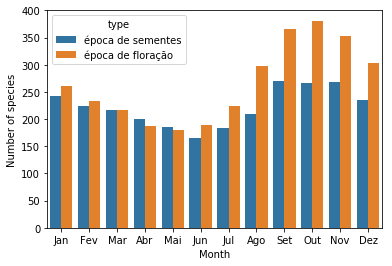

In [136]:
labels= ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
d = pd.DataFrame([ pcs_df.sum().drop('Espécie').values, pf_df.sum().drop('Espécie').values ], columns=labels)
d = d.stack().reset_index()
d.columns = ['type','Month','Number of species']
d['type'] = d['type'].apply(lambda x: 'época de sementes' if x==0 else 'época de floração')

sns.barplot(x='Month',y='Number of species',data=d,hue='type')

(0, 400)

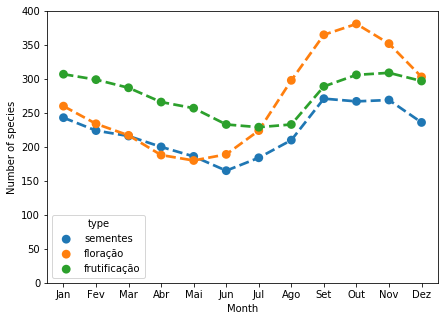

In [137]:
labels= ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
d = pd.DataFrame([ pcs_df.sum().drop('Espécie').values, 
                   pf_df.sum().drop('Espécie').values,
                   pfru_df.sum().drop('Espécie').values ], columns=labels)

d = d.stack().reset_index()
d.columns = ['type','Month','Number of species']
d['type'] = d['type'].apply(lambda x: {0:'sementes', 1:'floração',2:'frutificação'}[x])

plt.figure(figsize=(7,5))
sns.pointplot(x='Month',y='Number of species',data=d,hue='type',linestyles='--')
plt.ylim((0,400))

In [138]:
d = pd.DataFrame([ pcs_df.sum().drop('Espécie').values, 
                   pf_df.sum().drop('Espécie').values,
                   pfru_df.sum().drop('Espécie').values ], columns=labels)

d.stack()

0  Jan    243
   Fev    224
   Mar    216
   Abr    200
   Mai    186
   Jun    165
   Jul    184
   Ago    210
   Set    271
   Out    267
   Nov    269
   Dez    236
1  Jan    260
   Fev    234
   Mar    217
   Abr    188
   Mai    180
   Jun    189
   Jul    224
   Ago    298
   Set    365
   Out    381
   Nov    352
   Dez    303
2  Jan    307
   Fev    299
   Mar    287
   Abr    266
   Mai    257
   Jun    233
   Jul    229
   Ago    233
   Set    289
   Out    306
   Nov    309
   Dez    297
dtype: int64

---

# Wrap up

In [139]:
df

,Espécie,Nome Popular,Sinonímia,Gênero,Família,Bioma,Formação Vegetal,Fitofisionomias,Presença nos estados,Período de coleta de sementes,Beneficiamento de sementes,Porcentagem de germinação,Substrato da muda,Desenvolvimento da muda no viveiro,Número de sementes/kg,Armazenamento,Semeadura,Nível de sombreamento da muda no viveiro,Tolerância a Sombra,Estratégia ecológica de ocupação,Desenvolvimento da muda no campo,Recomendação de adubação no plantio no campo,Porte da planta,Período de floração,Período de frutificação,Uso Econômico,Caducifolia,Polinização,Dispersão
0,Abarema brachystachya,"[Timbuva, Olho-cabra-azul]",Inga brachystachya|Abarema obovata|Pithecellob...,Abarema,Fabaceae,[mata atlantica],"[florestal, savanica]","[floresta ombrofila densa, restinga arborea/ar...","[ba, es, mg, rj, sc, sp]","{'mata atlantica': {'sp': ['jun', 'out'], 'pr'...",Os frutos devem ser colhidos diretamente da ár...,3.0,ga,1.0,1.300,Sugerimos condições padrão para sementes com t...,2.0,NaN,0.0,recobrimento,0.0,None,arvore,"{'mata atlantica': {'pr': ['set', 'jun'], 'sp'...","{'mata atlantica': {'sp': ['jun', 'jun'], 'pr'...",[medicinal],0.0,[abelhas],[zoocoria]
1,Abarema cochleata,"[Saboeiro, Inga-chumbinho, Tento]",Inga cochleata,Abarema,Fabaceae,[amazonia],"[florestal, savanica]","[campinarana, savana, terra firme]","[am, ma, pa, to]","{'all': ['mai', 'jul']}",Os frutos devem ser colhidos diretamente da ár...,NaN,s1,1.0,NaN,NaN,1.0,3.0,0.0,diversidade,1.0,s01,arvore,"{'all': ['set', 'out']}","{'all': ['out', 'jul']}","[madeireiro, ornamental]",NaN,[beija-flores],[zoocoria]
2,Abarema floribunda,[Tento],Pithecellobium floribundum|Spruce ex,Abarema,Fabaceae,[amazonia],[florestal],[terra firme],"[ac, am]","{'all': ['jan', 'abr']}",Os frutos devem ser colhidos diretamente da ár...,NaN,s1,1.0,NaN,NaN,1.0,3.0,0.0,diversidade,1.0,s01,arvore,"{'all': ['jul', 'out']}","{'all': ['ago', 'abr']}","[madeireiro, ornamental]",NaN,[beija-flores],[zoocoria]
3,Abarema jupunba,"[Angelim-falso, Contas-de-nossa-senhora, Ingar...",Acacia jupunba,Abarema,Fabaceae,[amazonia],"[florestal, savanica]","[restinga, terra firme]","[ac, am, ap, ba, ce, es, ma, mg, pa, pb, pe, r...","{'all': ['jun', 'jul']}",Os frutos devem ser colhidos diretamente da ár...,1.0,s1,1.0,1.300,NaN,1.0,3.0,0.0,diversidade,1.0,s01,arvore,"{'all': ['out', 'jan']}","{'all': ['jan', 'jul']}","[madeireiro, ornamental]",0.0,[beija-flores],[zoocoria]
4,Abarema piresii,[Tento],NaN,Abarema,Fabaceae,[amazonia],"[florestal, savanica]","[campinarana, terra firme]","[am, mg, pa]","{'all': ['jan', 'jun']}",Os frutos devem ser colhidos diretamente da ár...,NaN,s1,1.0,NaN,NaN,1.0,3.0,0.0,diversidade,1.0,s01,arvore,"{'all': ['mai', 'set']}","{'all': ['jan', 'jun']}","[madeireiro, ornamental]",NaN,[beija-flores],[zoocoria]
5,Acanthosyris spinescens,[Sombra-de-touro],Osyris spinescens,Acanthosyris,Santalaceae,[pampa],"[florestal, savanica]","[floresta estacional, vegetacao savanoide]","[go, pr, rs]",NaN,Os frutos devem ser colhidos diretamente da ár...,NaN,NaN,NaN,0.340,NaN,1.0,NaN,0.0,diversidade,0.0,None,arvore,"{'all': ['out', 'nov']}","{'all': ['mar', 'mai']}","[alimenticio, latex, oleaginoso]",1.0,[insetos],[zoocoria]
6,Acca sellowiana,[Goiaba-serrana],Orthostemon sellowianus|Feijoa obovata|Feijoa ...,Acca,Myrtaceae,[pampa],[florestal],"[floresta estacional, mata ciliar]","[pr, rj, rs, sp]",NaN,frutos colhidos quando se desprendem facilment...,1.0,NaN,0.0,416.000,ortodoxa,2.0,NaN,0.0,diversidade,0.0,None,arvore,"{'all': ['set', 'out']}","{'all': ['mar', 'mai']}","[alimenticio, latex, madeireiro, oleaginoso]",NaN,[aves],[zoocoria]
7,Achyrocline satureioides,[Macela],Achyrocline candicans|Achyrocline satureioides...,Achyrocline,Asteraceae,[cerrado],[campestre],"[campo limpo, campo rupestre]","[ba, es, mg, pr, rj, rs, sc, sp]","{'cerrado': ['ago', 'out']}",Coleta de infrutescências (flores secas) com f...,0.0,NaN,NaN,2000.000,NaN,NaN,NaN,NaN,recobrimento,NaN,None,arbusto,"{'cerrado': ['mar', 'jun']}","{'cerrado': 

In [140]:
df['Nome Popular'] = df['Nome Popular'].str.join('|')
df['Bioma'] = df['Bioma'].str.join('|')
df['Formação Vegetal'] = df['Formação Vegetal'].str.join('|')
df['Fitofisionomias'] = df['Fitofisionomias'].str.join('|')
df['Presença nos estados'] = df['Presença nos estados'].str.join('|')
df['Uso Econômico'] = df['Uso Econômico'].str.join('|')
df['Polinização'] = df['Polinização'].str.join('|')
df['Dispersão'] = df['Dispersão'].str.join('|')

In [141]:
def structured_period_to_str(data):
    """
    Converts a structured period to a string
    """
    
    if pd.isnull(data):
        return np.NaN
    
    res_str=""
    for b,months_data in data.items():
        res_str += f"{b}: "
        
        if isinstance(months_data, dict):
            for state,months in months_data.items():
                res_str+= f"<{state}"
                for i,m in enumerate(months):
                    if i%2==0:
                        res_str+=f" ({m}-"
                    else:
                        res_str+=f"{m})"
                res_str+=">"

        
        elif isinstance(months_data, list):
            for i,m in enumerate(months_data):
                if i%2==0:
                    res_str+=f"({m}-"
                else:
                    res_str+=f"{m}) "
            res_str = res_str[:-1]

        res_str+='; '                       
                
    res_str = res_str[:-2].strip()              
    return res_str

In [142]:
df['Período de floração'].apply(structured_period_to_str).loc[9]

'cerrado: (jul-fev); pantanal: (out-fev); amazonia: (jul-jan)'

In [143]:
df['Período de floração'] = df['Período de floração'].apply(structured_period_to_str)
df['Período de coleta de sementes'] = df['Período de coleta de sementes'].apply(structured_period_to_str)
df['Período de frutificação'] = df['Período de frutificação'].apply(structured_period_to_str)

# Save results

In [144]:
data_dir = '../data/webambiente/cleaned/'

In [145]:
df.index.name='id'
df.to_csv(f"{data_dir}main.csv")

In [146]:
pf_df.index.name='id'
pf_df.to_csv(f"{data_dir}floration_periods.csv")

In [147]:
pcs_df.index.name='id'
pcs_df.to_csv(f"{data_dir}seed_collection_periods.csv")

In [148]:
pfru_df.index.name='id'
pfru_df.to_csv(f"{data_dir}fruiting_periods.csv")